In [42]:
#importing all important libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [43]:
#resize all the images
IMAGE_SIZE = [224,224]          #ResNet usually take 224,224 image size as a input but all depends on the Image resolution

train_path = "/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train"
test_path = "/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Test"

In [44]:
#Import the resnet50 library and add preprocessing layer
#Here we are using pre-trained imagenet weights
#include_top is mark as false becoz we don't need 1000 categories in the last/Top layer,we only need 3 to classify

resnet = ResNet50(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)

In [45]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [46]:
#No need to train existing weights Again
for layer in resnet.layers:
  layer.trainable = False

In [47]:
#Getting number of folders we have for classification
#useful for getting number of output classes

folders = glob("/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train/*")
folders

['/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train/mercedes',
 '/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train/audi',
 '/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train/lamborghini']

In [48]:
#Flatten the output of resnet into a vector
x = Flatten()(resnet.output)
x

<tf.Tensor 'flatten_2/Identity:0' shape=(None, 100352) dtype=float32>

In [49]:
#Creating the last layers with softmax to find the categorial output
prediction = Dense(len(folders),activation="softmax")(x)

#Creating Model
model = Model(inputs = resnet.input,outputs=prediction)

In [50]:
#Structure of Model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=["accuracy"])

In [52]:
#Use the Image Data Generator to import the images from the dataset
#Basically Data Augmentation

train_aug = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

#We do not Apply any augmentation techniques on test data
test_aug = ImageDataGenerator(rescale=1./255)

In [53]:
#Make sure you provide the same target size as intialized for IMAGE_SIZE

#Applying Data Augmentation Steps
train_set = train_aug.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Train",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode='categorical')


Found 64 images belonging to 3 classes.


In [54]:
test_set = test_aug.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Test",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode='categorical')


Found 58 images belonging to 3 classes.


In [55]:
#Fit the Model

History = model.fit_generator(train_set,
                            validation_data = test_set,
                            epochs = 50,
                            steps_per_epoch = len(train_set),
                            validation_steps = len(test_set))

Epoch 1/50
2/2 [==============================] - 1s 721ms/step - loss: 5.1899 - accuracy: 0.2656 - val_loss: 16.9728 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 344ms/step - loss: 11.2103 - accuracy: 0.3906 - val_loss: 3.1516 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 347ms/step - loss: 3.2297 - accuracy: 0.5000 - val_loss: 5.8626 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 346ms/step - loss: 5.9887 - accuracy: 0.4062 - val_loss: 5.0809 - val_accuracy: 0.1897
Epoch 5/50
2/2 [==============================] - 1s 345ms/step - loss: 3.9659 - accuracy: 0.3906 - val_loss: 1.3629 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 1s 343ms/step - loss: 1.4502 - accuracy: 0.5000 - val_loss: 4.4360 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 337ms/step - loss: 2.6527 - accuracy: 0.4375 - val_loss: 3.5777 - val_accuracy: 0.1724
Epoch 8/50
2/2 [==

In [56]:
#model.history.keys()

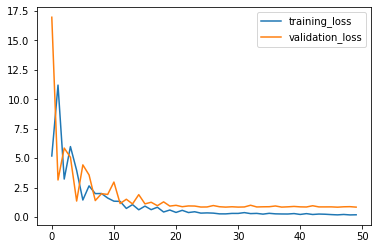

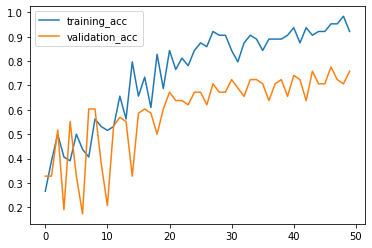

In [58]:
plt.plot(History.history['loss'],label='training_loss')
plt.plot(History.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

plt.plot(History.history['accuracy'],label='training_acc')
plt.plot(History.history['val_accuracy'],label='validation_acc')
plt.legend()
plt.show()

In [59]:
#saving our model as h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [60]:
y_pred = model.predict(test_set)
y_pred

array([[6.2918276e-02, 9.2089808e-01, 1.6183641e-02],
       [5.9891940e-04, 9.9312061e-01, 6.2804483e-03],
       [1.6663123e-02, 9.1190600e-01, 7.1430869e-02],
       [2.7529958e-01, 4.0651545e-01, 3.1818500e-01],
       [1.4997399e-03, 7.7140135e-01, 2.2709891e-01],
       [2.1112397e-02, 6.6881543e-01, 3.1007218e-01],
       [3.8759717e-01, 3.0351356e-01, 3.0888930e-01],
       [2.8905019e-02, 4.7434372e-01, 4.9675134e-01],
       [4.3379506e-03, 9.7118664e-01, 2.4475459e-02],
       [6.3911919e-03, 4.6725791e-02, 9.4688302e-01],
       [8.3652698e-02, 2.3388287e-02, 8.9295900e-01],
       [1.0349385e-01, 6.2812370e-01, 2.6838243e-01],
       [4.1304510e-03, 6.3830596e-01, 3.5756359e-01],
       [8.5932469e-01, 9.5376626e-02, 4.5298707e-02],
       [1.3312531e-01, 6.8917221e-01, 1.7770247e-01],
       [4.7586691e-06, 1.2196352e-03, 9.9877554e-01],
       [2.5339430e-02, 2.9661945e-01, 6.7804110e-01],
       [2.7115712e-02, 7.9562968e-01, 1.7725457e-01],
       [7.9283444e-03, 9.639

In [61]:
#Taking the class which have highest probability
import numpy as np
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0,
       1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1])

In [62]:
#Now we have to predict for the new data set
#Read one Image
img = image.load_img('/content/drive/My Drive/Colab Notebooks/Car Brand Prediction using Transfer Learning ResNet50/Datasets/Test/mercedes/29.jpg',target_size=(224,224))

In [63]:
image

<module 'tensorflow.keras.preprocessing.image' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/preprocessing/image/__init__.py'>

In [64]:
#Convert image into image array
x = image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]],

       [[ 8., 11., 16.],
        [ 8., 11., 16.],
        [ 9., 12., 17.],
        ...,
        [ 9., 12., 17.],
        [ 8., 11., 16.],
        [ 8., 11., 16.]]

In [65]:
x.shape

(224, 224, 3)

In [66]:
#Rescale
x=x/255

In [67]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [69]:
car = np.argmax(model.predict(img_data),axis=1)
car

array([2])